In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasgui import show
from collections import Counter
from simulators.statistic_evaluator import roll_a_lot, RollResult, computed_chances, roll

In [2]:
skill = 65
# art_crit = art_skill // 10
skill_crit = 50

card_complexity = 85
# card_crit = card_complexity // 10
card_crit = 5


count = 200000
# lane_size = 3

c = Counter()

rolls = roll_a_lot(
    skill=skill, card_complexity=card_complexity, skill_crit=skill_crit, card_crit=card_crit, count=count
)
c.update(r.roll_result for r in rolls)
estimated_stats = sorted([(i, round(c[i] / c.total() * 100.0, 2)) for i in c])
cc = computed_chances(skill, card_complexity, skill_crit, card_crit)

In [3]:
df = pd.DataFrame([(r.art_roll, r.card_roll, r.roll_result.name) for r in rolls], columns=['art', 'card','roll_result'])

In [4]:
# df

In [5]:
cat_type = pd.CategoricalDtype(categories=[str(i.name) for i in RollResult], ordered=True)

In [6]:
cat_type

CategoricalDtype(categories=['SUCCESS', 'STAY', 'FAIL', 'FAIL_AND_DAMAGE'], ordered=True, categories_dtype=object)

In [7]:
df['roll_result'] = df['roll_result'].astype(cat_type)

Estimated : [(<RollResult.SUCCESS: 1>, 60.05), (<RollResult.STAY: 2>, 9.75), (<RollResult.FAIL: 3>, 26.82), (<RollResult.FAIL_AND_DAMAGE: 4>, 3.38)]
calculated : RollChances(skill=65, complexity=85, win=9.75, stay=5.25, fail=27.150000000000002, damage=3.35)


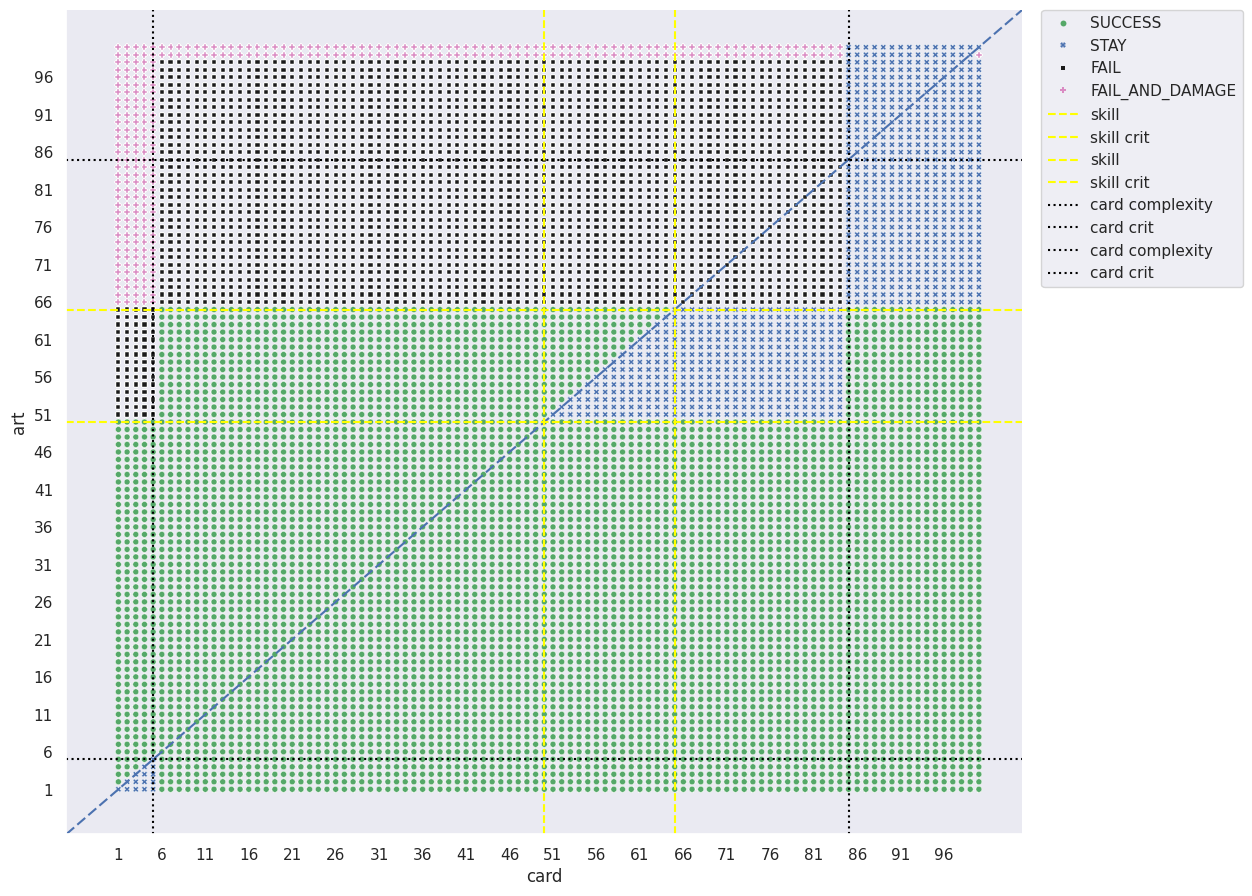

In [8]:
print(f"Estimated : {estimated_stats}")
print(f"calculated : {cc._as_percent_dict() if cc else None}")

sns.set_theme(style="dark")
#sns.color_palette("Set1")
plot=sns.relplot(data=df, x="card", y="art", hue="roll_result", style="roll_result", s=18, palette=["C2", "C0", "k", "C6"], facet_kws=dict(legend_out=False))
plot.set(xticks=np.arange(1,101,5), yticks=np.arange(1,101,5))
plot.figure.set_size_inches(12,10)
# x=y line
plot.ax.axline(xy1=(0, 0), slope=1, color="b", dashes=(5, 2))
# skill and complexity lines
skill_line = plot.ax.axhline(y=skill, color = "yellow", linestyle = "dashed", label="skill")
skill_crit_line = plot.ax.axhline(y=skill_crit, color = "yellow", linestyle = "dashed", label="skill crit")
skill_lineV = plot.ax.axvline(x=skill, color = "yellow", linestyle = "dashed", label="skill")
skill_crit_lineV = plot.ax.axvline(x=skill_crit, color = "yellow", linestyle = "dashed", label="skill crit")

complexity_line = plot.ax.axvline(x=card_complexity, color = "black", linestyle = "dotted", label="card complexity")
complexity_crit_line = plot.ax.axvline(x=card_crit, color = "black", linestyle = "dotted", label="card crit")
complexity_lineh = plot.ax.axhline(y=card_complexity, color = "black", linestyle = "dotted", label="card complexity")
complexity_crit_lineh = plot.ax.axhline(y=card_crit, color = "black", linestyle = "dotted", label="card crit")

handles = [skill_line, complexity_line]
labels = [h.get_label() for h in handles]
plot.ax.legend(handles=handles, labels=labels, fontsize='x-small',
              loc='upper left', ncol=2, facecolor='white', framealpha=1) 
plot.ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


# plot.add_legend(loc='upper center',facecolor='white', framealpha=1)


In [9]:
chances = [computed_chances(skill, complexity) for skill in range(30, 100) for complexity in range(30,100)]
df2 = pd.DataFrame(data=[chance._as_percent_dict() for chance in chances])
df2

,skill,complexity,win,stay,fail,damage
0,30,30,25.500,52.690,19.17,2.64
1,30,31,20.700,48.300,19.85,2.66
2,30,32,20.400,47.600,20.53,2.68
3,30,33,20.100,46.900,21.21,2.70
4,30,34,19.800,46.200,21.89,2.72
...,...,...,...,...,...,...
4895,99,95,53.515,37.435,7.24,1.81
4896,99,96,52.650,38.290,7.23,1.83
4897,99,97,51.775,39.155,7.22,1.85
4898,99,98,50.890,40.030,7.21,1.87
